In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from scipy.stats import spearmanr

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [476]:
sns.set(font_scale=1.5)

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = None


In [477]:
df = pd.read_csv('Data/student-mat.csv', sep=';')

In [478]:
display(df.head(), df.shape)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


(395, 33)

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<b>Observation:</b>

16 int columns and 17 string

In [480]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Checking for null values

In [481]:
df.isna().sum().sum()

0

### Final grade distribution

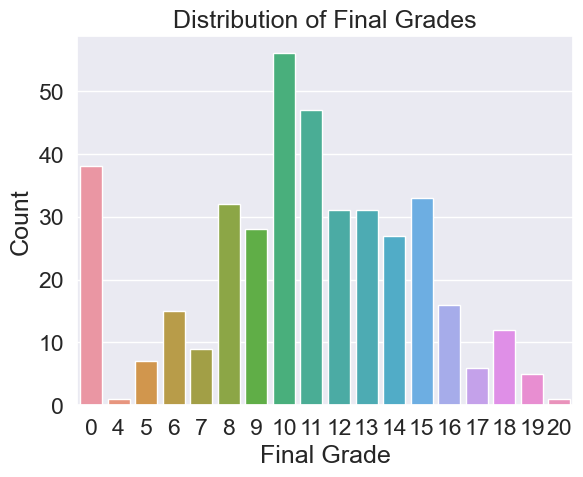

In [482]:
sns.countplot(x='G3', data=df)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

<b>Observation:</b>

The data seems to be normally distributed, apart from the 0 value, since there aren't any null values<br>
the 0 is probably for the students who didn't appear for the final exam.

### Checking and cleaning outliers

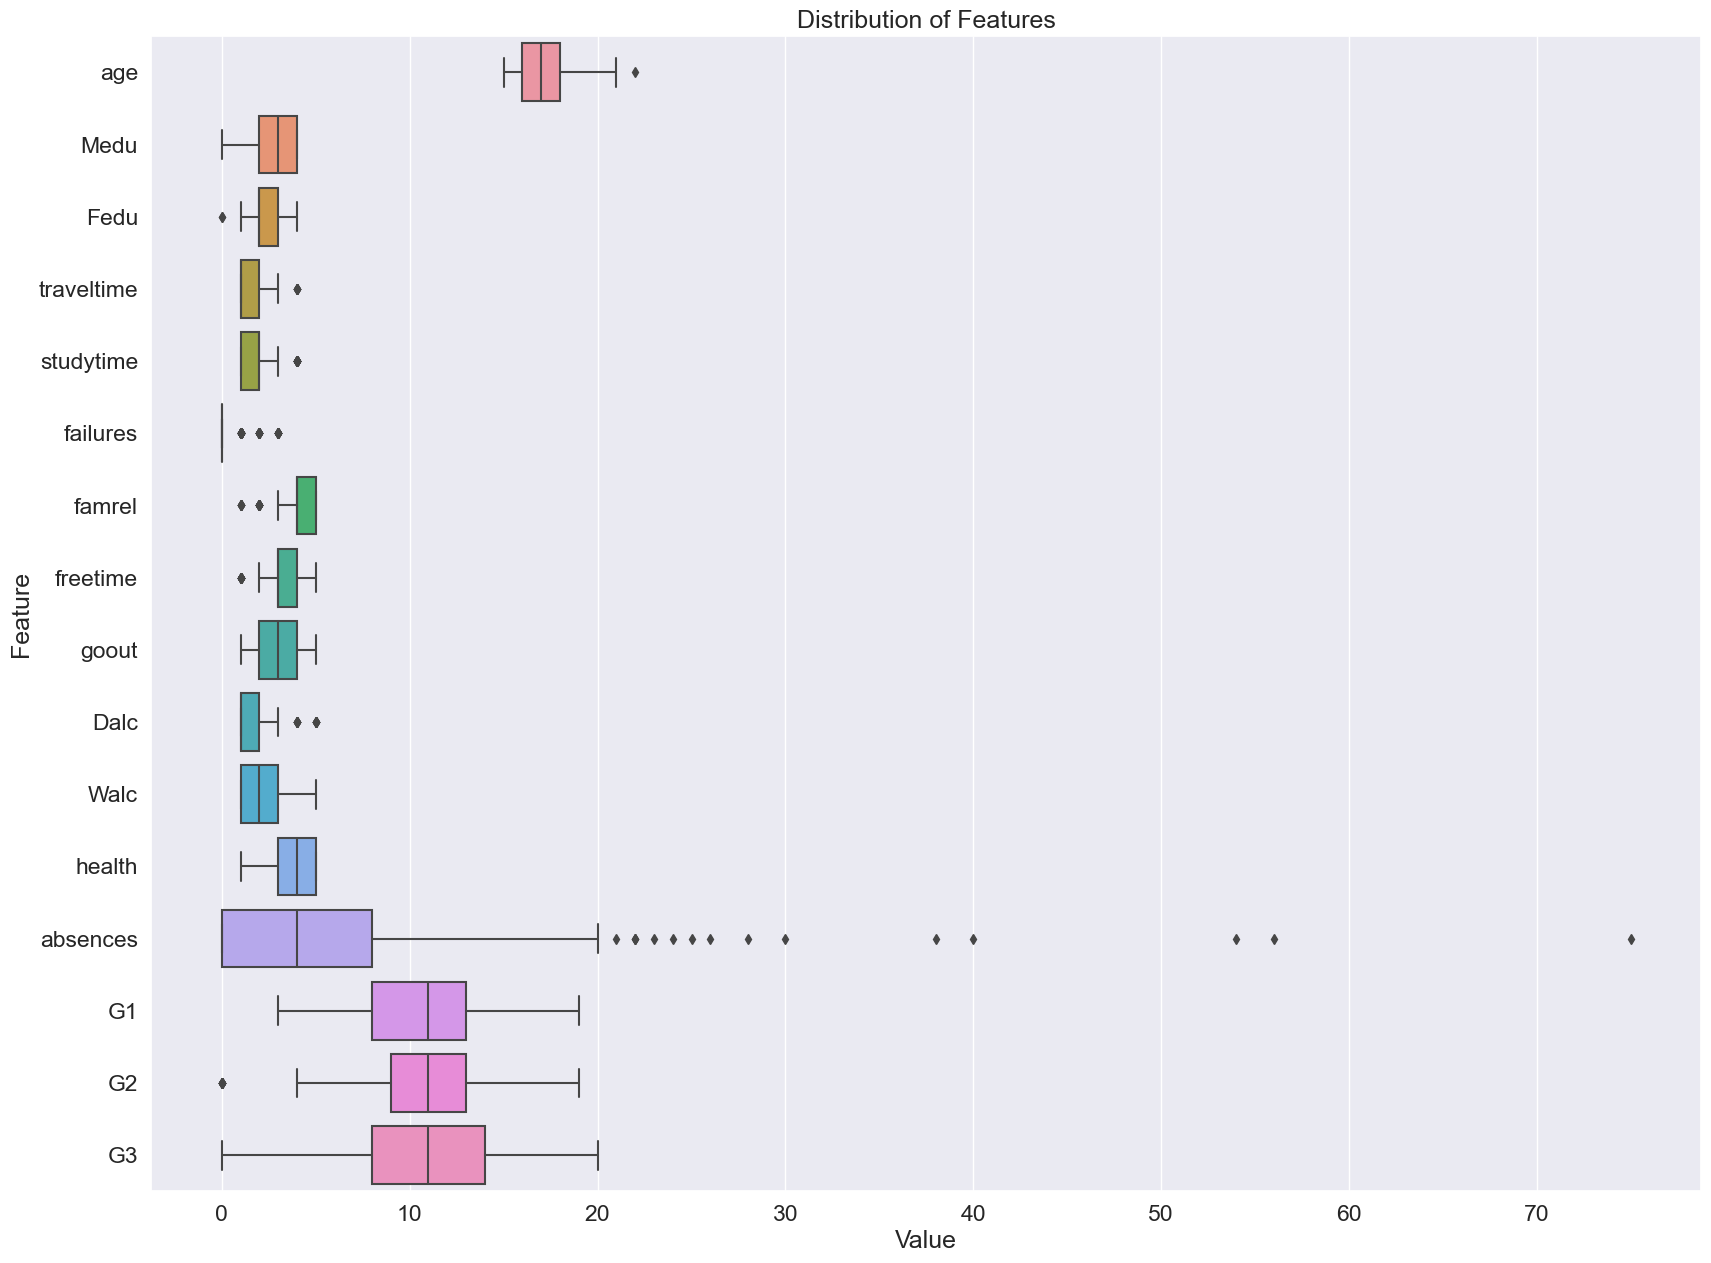

In [483]:
fig = plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient='h')
plt.title('Distribution of Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

In [484]:
df['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

#### Failures

In [485]:
df['failures'].unique()

array([0, 3, 2, 1])

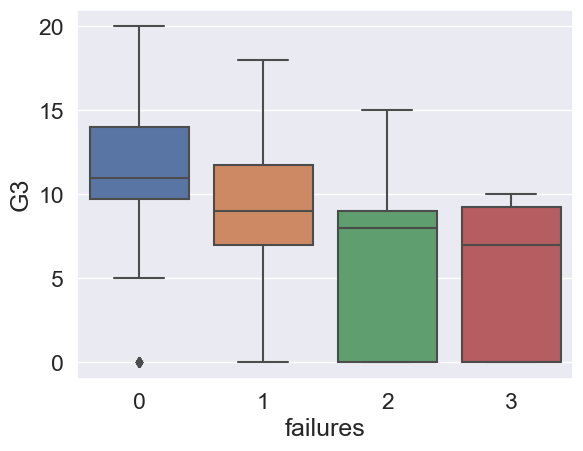

In [486]:
sns.boxplot(data=df, x='failures', y='G3')
plt.show()

In [487]:
def delete_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    filtered_df = df.copy()

    for col in numeric_cols:
        iqr = filtered_df[col].quantile(0.75) - filtered_df[col].quantile(0.25)
        up_lim = filtered_df[col].quantile(0.75) + 1.5 * iqr
        low_lim = filtered_df[col].quantile(0.25) - 1.5 * iqr
        filtered_df = filtered_df[(filtered_df[col] >= low_lim) & (filtered_df[col] <= up_lim)]

    return filtered_df

In [488]:
df['failures'].unique()

array([0, 3, 2, 1])

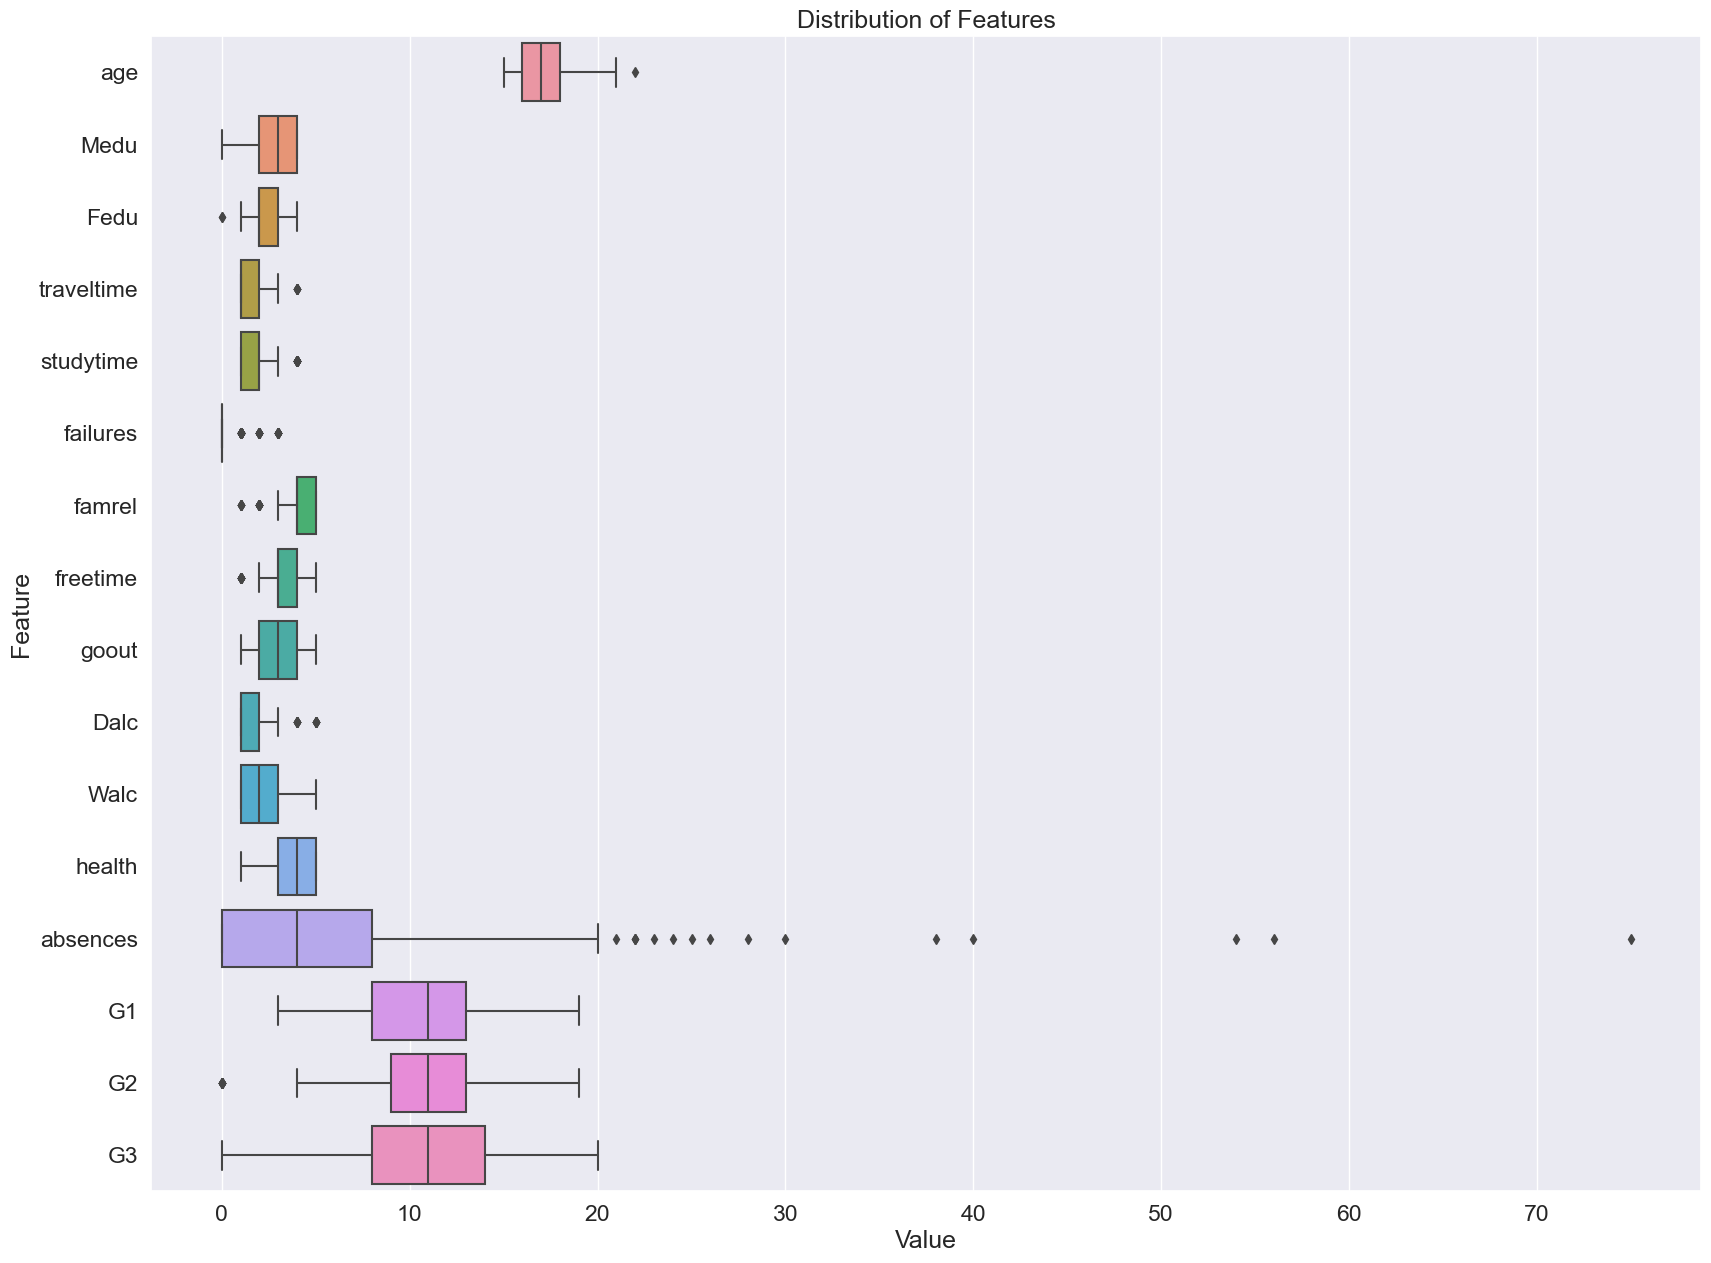

In [489]:
fig = plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient='h')
plt.title('Distribution of Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

In [490]:
df = delete_outliers(df)

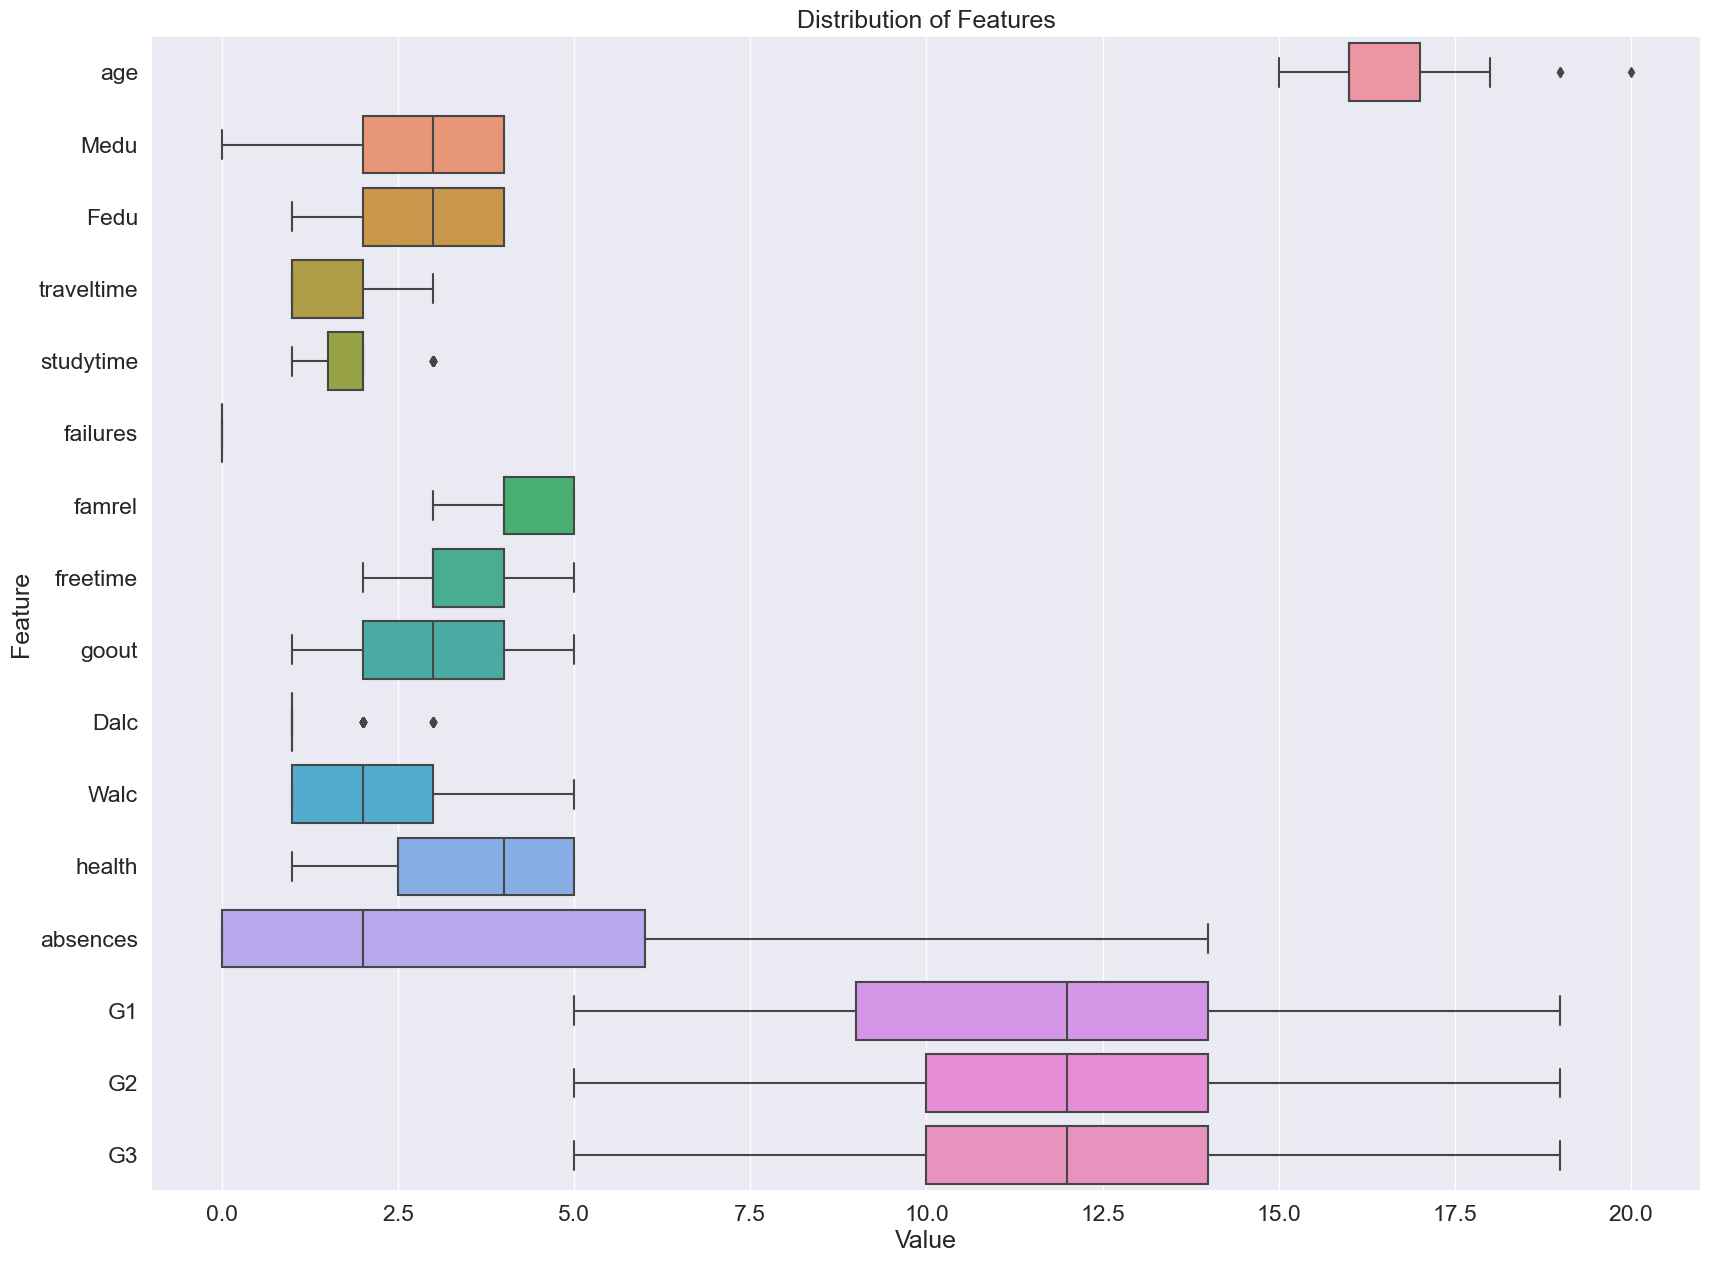

In [491]:
fig = plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient='h')
plt.title('Distribution of Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

### Relation ship between a parent's education and final grade

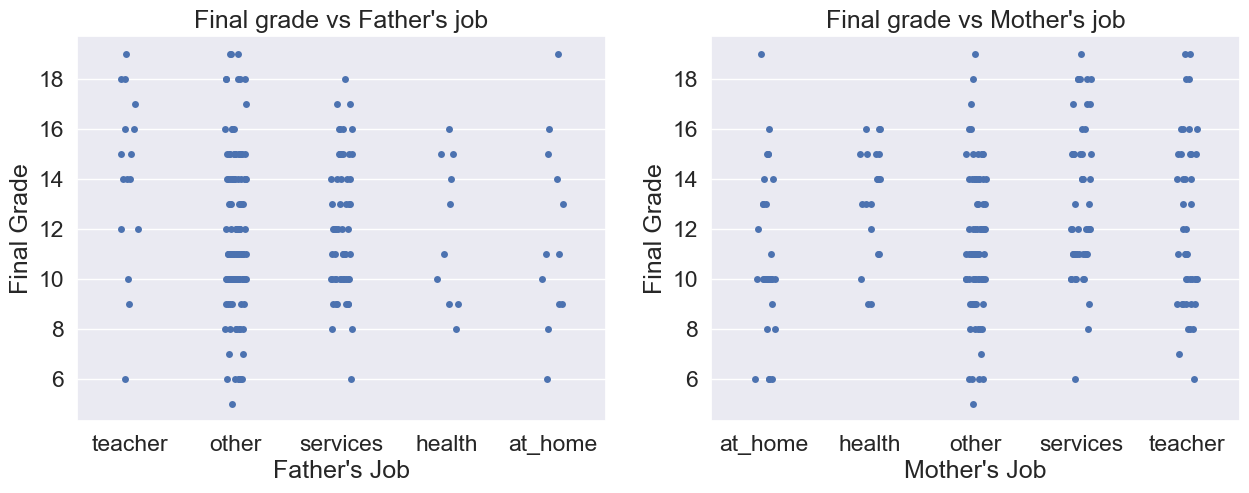

In [492]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.stripplot(x='Fjob', y='G3', data=df, ax=ax[0])
sns.stripplot(x='Mjob', y='G3', data=df, ax=ax[1])

ax[0].set_xlabel('Father\'s Job')
ax[0].set_ylabel('Final Grade')
ax[0].set_title('Final grade vs Father\'s job')
ax[1].set_xlabel('Mother\'s Job')
ax[1].set_ylabel('Final Grade')
ax[1].set_title('Final grade vs Mother\'s job')
plt.show()

<b>Observation:</b>

There seems to be no relationship between a parent's education and the final grade

### Relationship between travel time and final grade

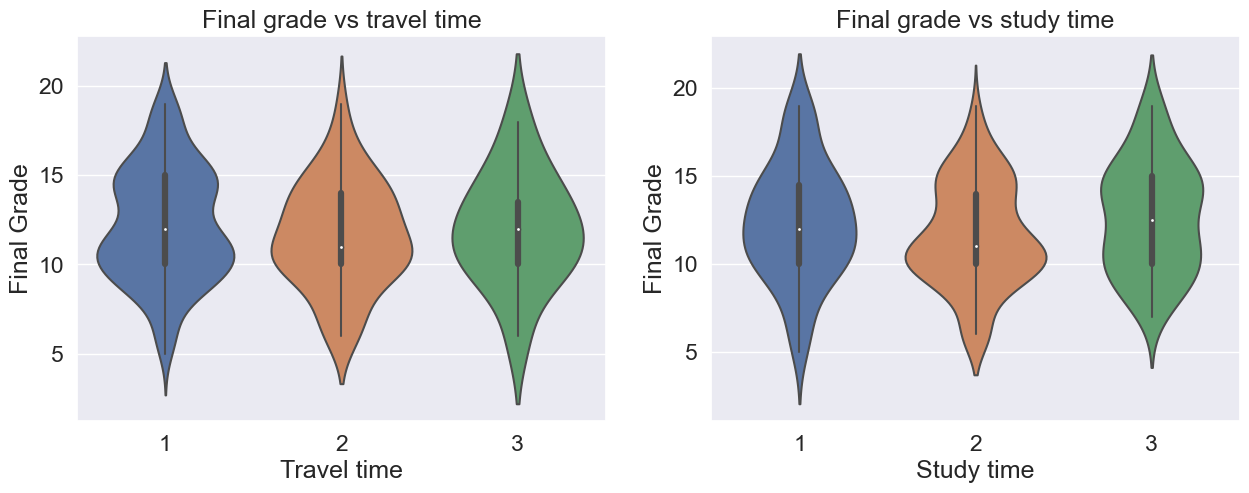

In [493]:
# We can use a violin plot or box plot since we are checking for the relationship between ordinal and continuous variables.

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x='traveltime', y='G3', data=df, ax=ax[0])
sns.violinplot(x='studytime', y='G3', data=df, ax=ax[1])

ax[0].set_xlabel('Travel time')
ax[0].set_ylabel('Final Grade')
ax[0].set_title('Final grade vs travel time')
ax[1].set_xlabel('Study time')
ax[1].set_ylabel('Final Grade')
ax[1].set_title('Final grade vs study time')
plt.show()

<b>Observation:</b>

There seem to be a correlation betwween travel time and final grade, as students who travel longer have lower grades<br>
There is alos a correlation between study time and final grade, as the students who study for longer have higher grades

It would be interesting to check the relationship between travel time and study time

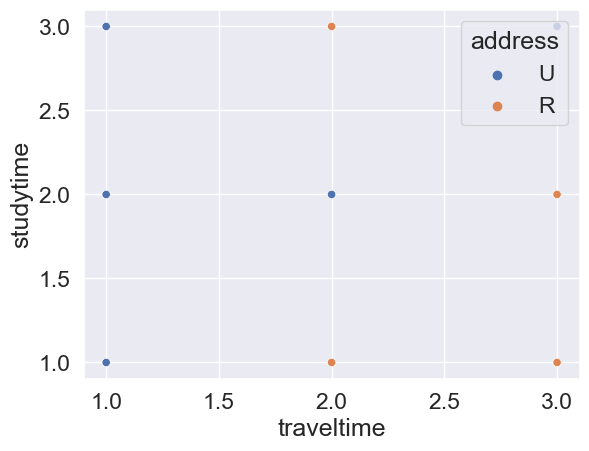

In [494]:
# We can use scatterplot between two ordinal variables.
sns.scatterplot(data=df, x='traveltime', y='studytime', hue='address')
plt.show()

<b>Observation</b>

There seems to be no relationship between travel time and study time

### Impact of Internet access at home on the final grade

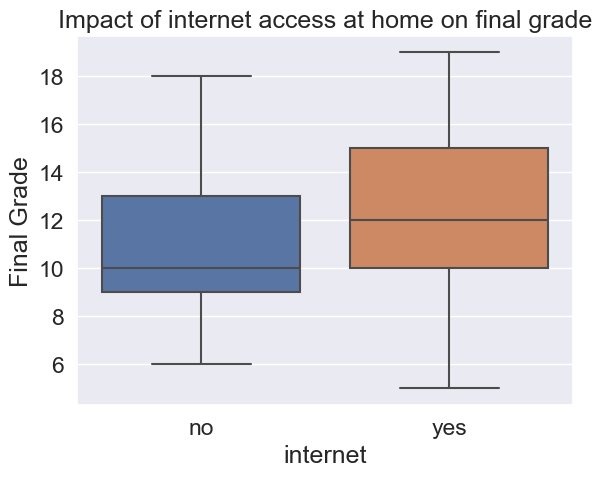

In [495]:
sns.boxplot(data=df, x='internet', y='G3')
plt.title('Impact of internet access at home on final grade')
plt.ylabel('Final Grade')
plt.show()

<b>Observation:</b>

Student with access to the internet at home score better on average.

In [496]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no


In [497]:
df_binary1 = df_cat.iloc[:,0:5]
df_binary2 = df_cat.iloc[:,9:]
display(df_binary1.head(), df_binary2.head())

,school,sex,address,famsize,Pstatus
0,GP,F,U,GT3,A
1,GP,F,U,GT3,T
3,GP,F,U,GT3,T
4,GP,F,U,GT3,T
5,GP,M,U,LE3,T


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no
5,no,yes,yes,yes,yes,yes,yes,no


In [498]:
df_binary = pd.concat([df_binary1, df_binary2], axis=1)
df_binary.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,no,yes,yes,yes,yes,yes,yes,no


In [499]:
df_binary.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,no,yes,yes,yes,yes,yes,yes,no


In [500]:
for cols in df_binary.columns:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
3,0,0,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,services,other,reputation,mother,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      219 non-null    int64 
 1   sex         219 non-null    int64 
 2   age         219 non-null    int64 
 3   address     219 non-null    int64 
 4   famsize     219 non-null    int64 
 5   Pstatus     219 non-null    int64 
 6   Medu        219 non-null    int64 
 7   Fedu        219 non-null    int64 
 8   Mjob        219 non-null    object
 9   Fjob        219 non-null    object
 10  reason      219 non-null    object
 11  guardian    219 non-null    object
 12  traveltime  219 non-null    int64 
 13  studytime   219 non-null    int64 
 14  failures    219 non-null    int64 
 15  schoolsup   219 non-null    int64 
 16  famsup      219 non-null    int64 
 17  paid        219 non-null    int64 
 18  activities  219 non-null    int64 
 19  nursery     219 non-null    int64 
 20  higher    

###  Find top 3 highly correlated numerical and categorical features with the target variable.

In [502]:
df_num = df.select_dtypes(include=['int64',])

In [503]:
df_cat = df.select_dtypes(include=['object',])
df_cat.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
3,health,services,home,mother
4,other,other,home,father
5,services,other,reputation,mother


In [504]:
df['failures']

0      0
1      0
3      0
4      0
5      0
      ..
385    0
386    0
388    0
393    0
394    0
Name: failures, Length: 219, dtype: int64

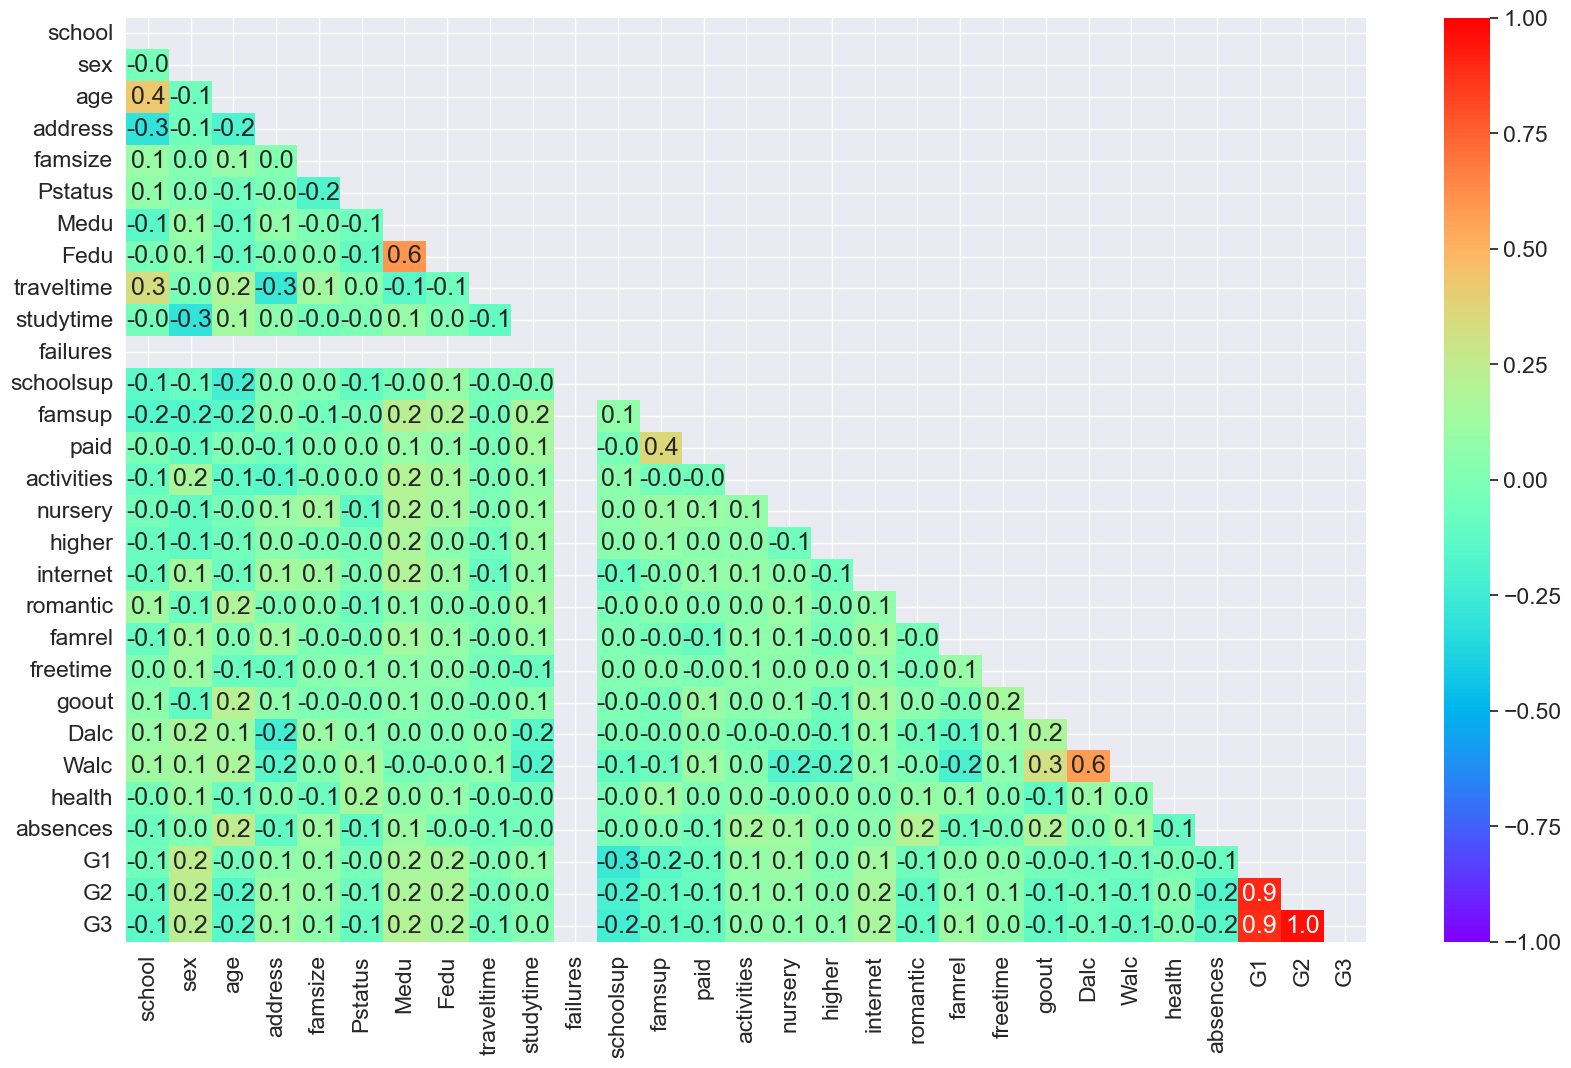

In [505]:
df_corr = df_num.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, fmt='.1f', cmap='rainbow', ax=ax)
plt.show()

<b>Observation:</b>

Collinearity - G1 And G2 are highly correllated with the target variable G3.</br>
MultiCollinearity - G1 and G2 are highly correlated either we remove one or merge them together into a new feature.<br>
Other - There is also some collinearity between drinking on the weekend and drinking on weekdays and between the mother's education and the father's education.

We should use other methods (VIF) to be sure.

In [506]:
# Assign ranks to the grades
df_rank = df.copy()
df_rank['rank'] = df_rank['G3'].rank(method='min')

# Calculate Spearman's rank correlation coefficient
def spearman_r(df):
    for col in df_cat.columns:
        corr_coef, p_value = spearmanr(df_rank[col], df_rank['rank'])
        print('Spearman\'s rank for: {}'.format(col))
        print('correlation coefficient:', corr_coef)
        print('p-value:', p_value)
        print('==================')

In [507]:
spearman_r(df_cat)

Spearman's rank for: Mjob
correlation coefficient: 0.10427371167855952
p-value: 0.12393227357277711
Spearman's rank for: Fjob
correlation coefficient: 0.13482125705088904
p-value: 0.046276524310468276
Spearman's rank for: reason
correlation coefficient: 0.03886185148731279
p-value: 0.5673031225990557
Spearman's rank for: guardian
correlation coefficient: 0.011642044696407792
p-value: 0.8639828714832722


<b>Observation:</b>

No high correlation between the categorical features and target value

### Feature Engineering

In [508]:
df_num_alc = df_num.copy()
df_num_alc.insert(len(df_num.columns) - 6, 'alcohol', round((df_num_alc['Dalc'] + df_num_alc['Walc']) / 2))
df_num_alc.drop(['Dalc', 'Walc'], axis=1, inplace=True)

In [509]:
df_num2 = df_num_alc.copy()
df_num2.insert(2, 'parental_edu', round((df_num2['Medu'] + df_num2['Fedu']) / 2))
df_num2.drop(['Medu', 'Fedu'], axis=1, inplace=True)

In [510]:
df_num3 = df_num2.copy()
df_num3.insert(len(df_num3.columns) - 1, 'G1_G2', round((df_num3['G1'] + df_num3['G2']) / 2))
df_num3.drop(['G1', 'G2'], axis=1, inplace=True)

In [511]:
new_df = df_cat.join(df_num3)
new_df.head()

,Mjob,Fjob,reason,guardian,school,sex,parental_edu,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,alcohol,health,absences,G1_G2,G3
0,at_home,teacher,course,mother,0,0,4.0,18,1,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1.0,3,6,6.0,6
1,at_home,other,course,father,0,0,1.0,17,1,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1.0,3,4,5.0,6
3,health,services,home,mother,0,0,3.0,15,1,0,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1.0,5,2,14.0,15
4,other,other,home,father,0,0,3.0,16,1,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,2.0,5,4,8.0,10
5,services,other,reputation,mother,0,1,4.0,16,1,1,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,2.0,5,10,15.0,15


In [512]:
def dummy_encode(df, col_names):
  df_encoded  = df.copy()

  for col in col_names:
    index = df_encoded.columns.get_loc(col)
    dummy_encoded = pd.get_dummies(df_encoded[col], prefix=col)
    df_encoded = pd.concat([df_encoded.iloc[:, : index], dummy_encoded, df_encoded.iloc[:, index :]], axis=1)
    df_encoded.drop(df.columns[index], axis=1, inplace=True)
    
  return df_encoded

In [513]:
col_to_encode = ['guardian', 'reason','Fjob','Mjob']
df_encoded = dummy_encode(new_df, col_to_encode )
df_encoded.head()

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,parental_edu,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,alcohol,health,absences,G1_G2,G3
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,4.0,18,1,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1.0,3,6,6.0,6
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1.0,17,1,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1.0,3,4,5.0,6
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,3.0,15,1,0,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1.0,5,2,14.0,15
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,3.0,16,1,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,2.0,5,4,8.0,10
5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,4.0,16,1,1,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,2.0,5,10,15.0,15


In [514]:
col_to_scaled = ['age', 'parental_edu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'alcohol', 'G1_G2']
df_scaled = df_encoded.copy()

scaler = StandardScaler(with_std=True, with_mean=True)
# scaler = MinMaxScaler()
for col in col_to_scaled:
    df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1, 1))

In [515]:
display(df_scaled.head(), df_scaled.shape)

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,parental_edu,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,alcohol,health,absences,G1_G2,G3
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1.103917,1.397840,1,0,0,1.126159,0.046658,0.0,1,0,0,0,1,1,0,0,-0.198889,-0.339891,0.982082,-0.960264,-0.375159,0.653749,-1.931152,6
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,-1.856383,0.497467,1,0,1,-0.598518,0.046658,0.0,0,1,0,0,0,1,1,0,1.253003,-0.339891,-0.004505,-0.960264,-0.375159,0.100965,-2.266007,6
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0.117150,-1.303280,1,0,1,-0.598518,1.506399,0.0,0,1,1,1,1,1,1,1,-1.650781,-1.521415,-0.991092,-0.960264,1.041390,-0.451819,0.747691,15
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0.117150,-0.402907,1,0,1,-0.598518,0.046658,0.0,0,1,1,0,1,1,0,0,-0.198889,-0.339891,-0.991092,0.322040,1.041390,0.100965,-1.261441,10
5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1.103917,-0.402907,1,1,1,-0.598518,0.046658,0.0,0,1,1,1,1,1,1,0,1.253003,0.841634,-0.991092,0.322040,1.041390,1.759316,1.082546,15


(219, 43)

### Dimensionality reduction using corr

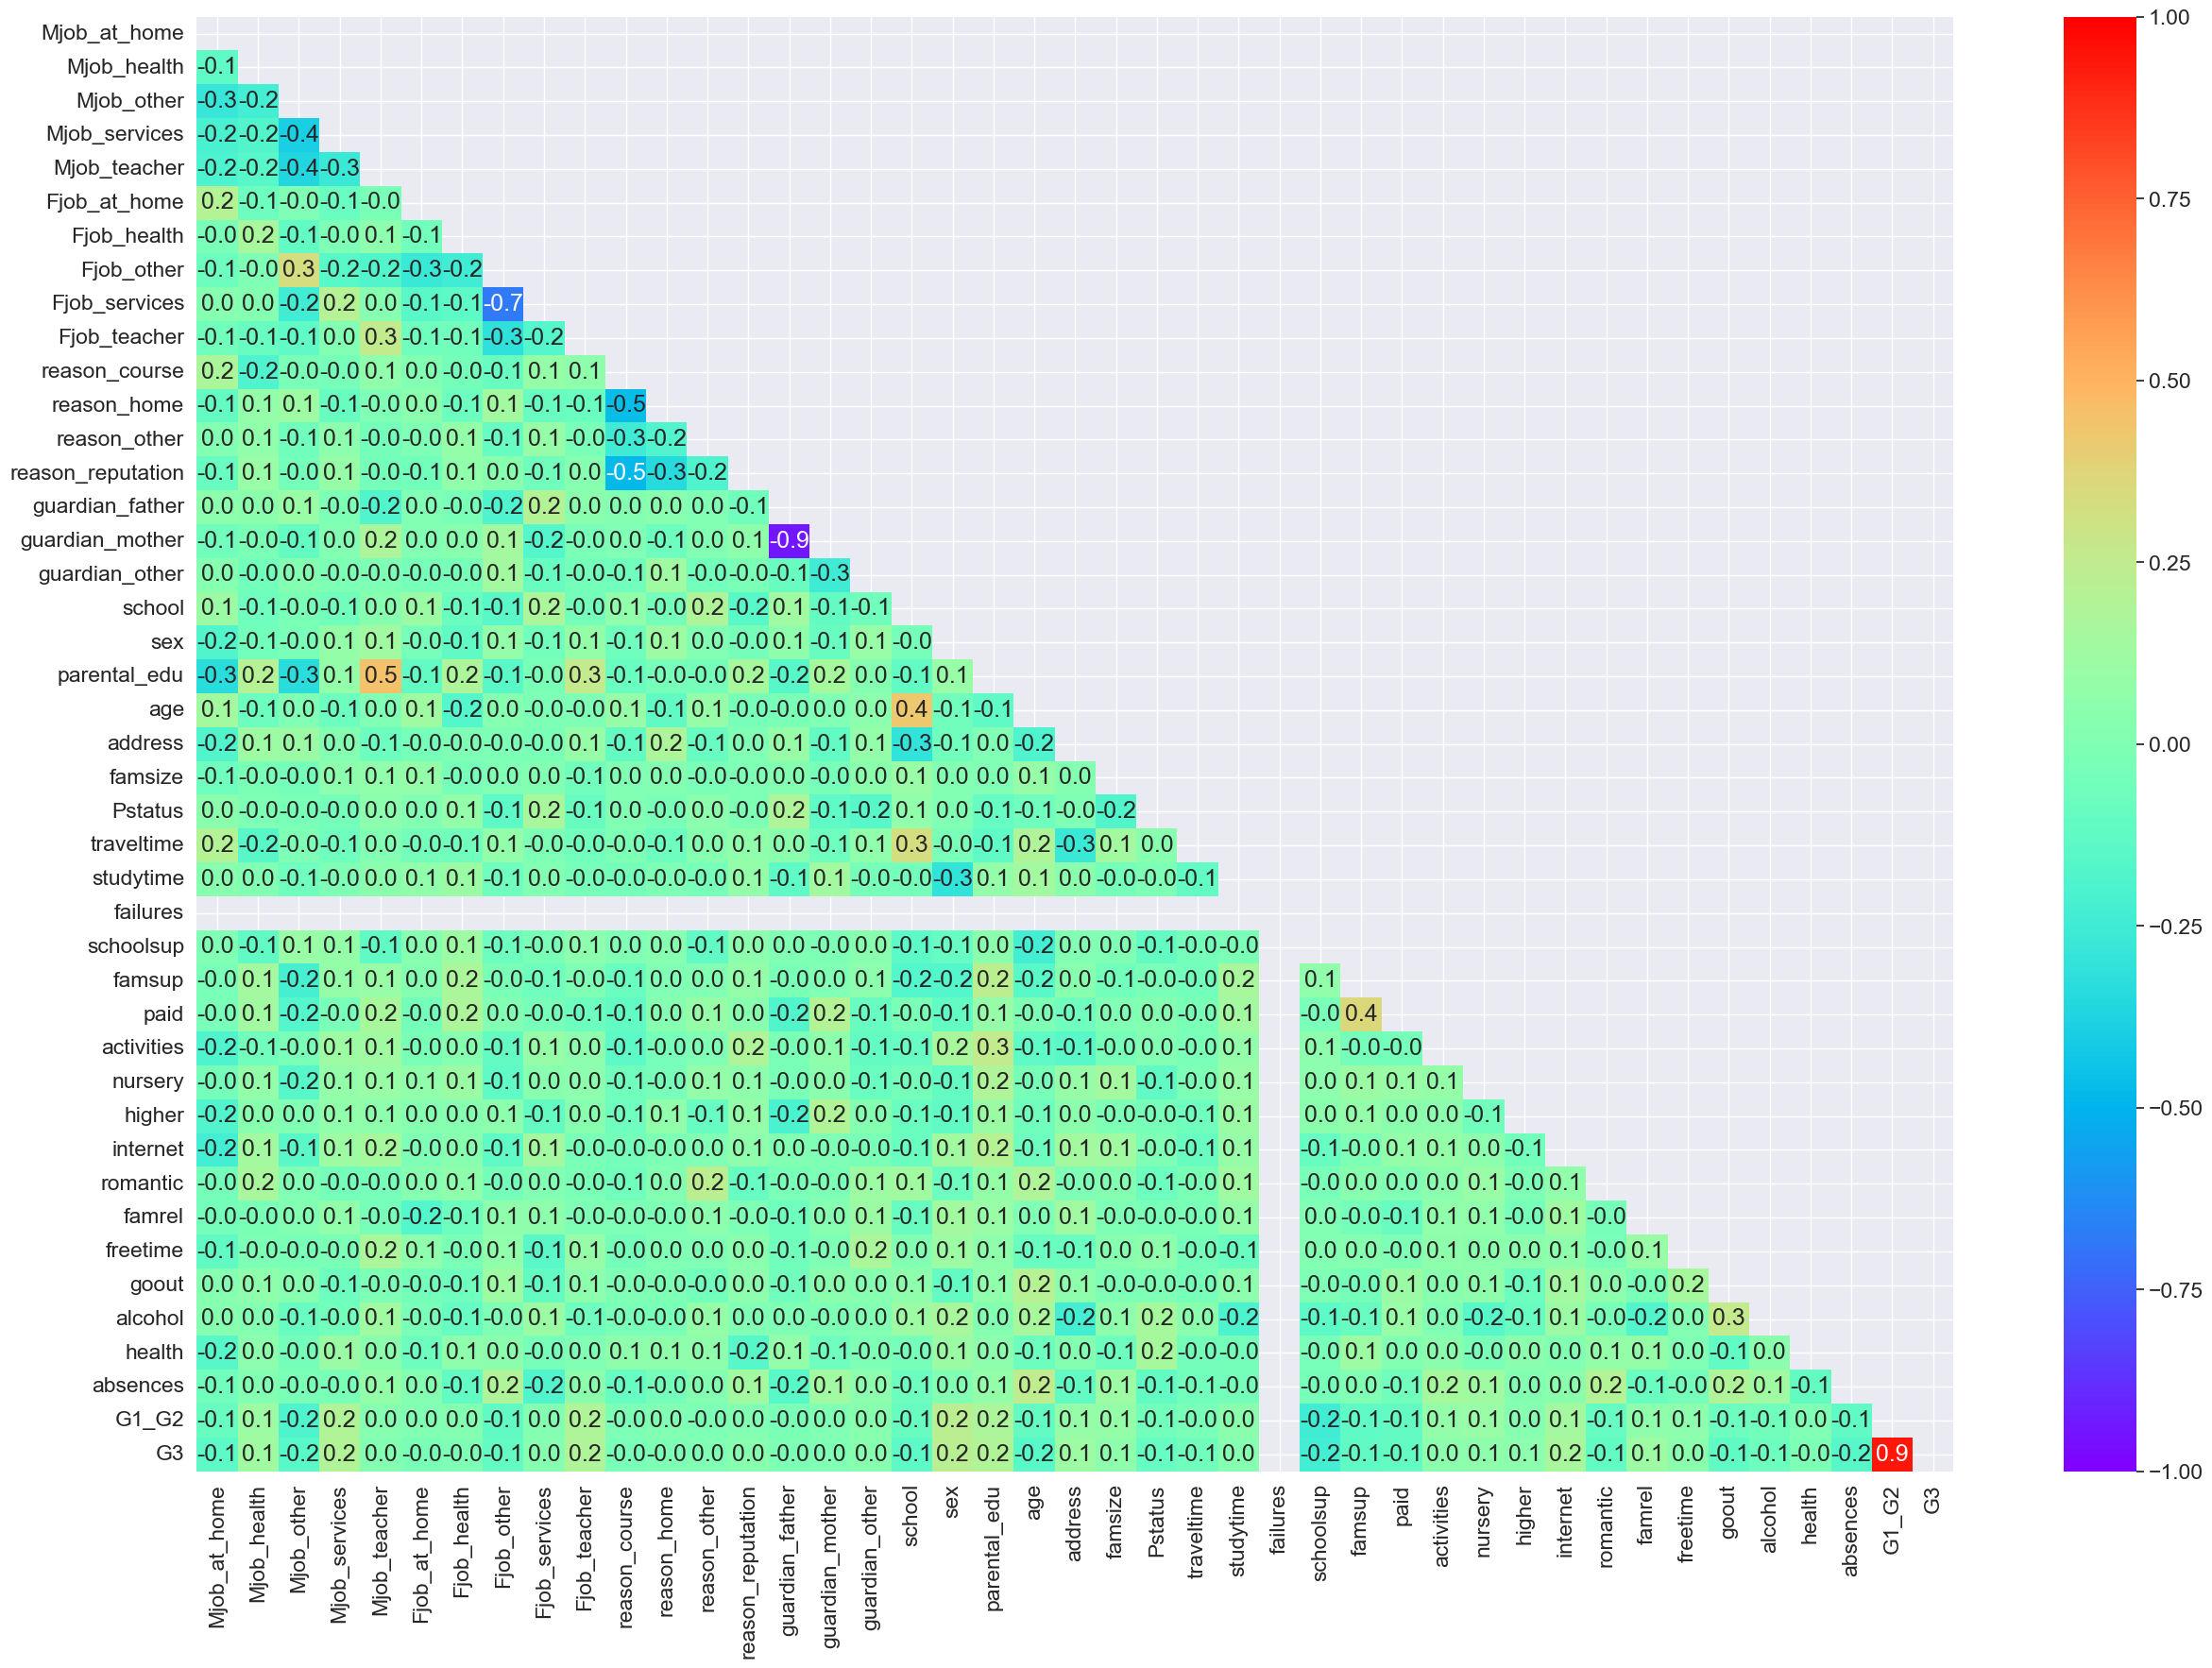

In [516]:
df_corr = df_scaled.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, fmt='.1f', cmap='rainbow', ax=ax)
plt.show()

In [517]:
# select features with an absolute correlation greater than 0.1
corr = df_scaled.corr()
corr_features = corr.index[abs(corr['G3']) > 0.1]
corr_features

Index(['Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Fjob_other', 'Fjob_teacher', 'school', 'sex', 'parental_edu', 'age',
       'address', 'schoolsup', 'famsup', 'paid', 'internet', 'romantic',
       'famrel', 'goout', 'absences', 'G1_G2', 'G3'],
      dtype='object')

In [518]:
df_final = df_scaled[corr_features]
df_final.head()

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Fjob_other,Fjob_teacher,school,sex,parental_edu,age,address,schoolsup,famsup,paid,internet,romantic,famrel,goout,absences,G1_G2,G3
0,1,0,0,0,0,1,0,0,1.103917,1.397840,1,1,0,0,0,0,-0.198889,0.982082,0.653749,-1.931152,6
1,1,0,0,0,1,0,0,0,-1.856383,0.497467,1,0,1,0,1,0,1.253003,-0.004505,0.100965,-2.266007,6
3,0,1,0,0,0,0,0,0,0.117150,-1.303280,1,0,1,1,1,1,-1.650781,-0.991092,-0.451819,0.747691,15
4,0,0,1,0,1,0,0,0,0.117150,-0.402907,1,0,1,1,0,0,-0.198889,-0.991092,0.100965,-1.261441,10
5,0,0,0,1,1,0,0,1,1.103917,-0.402907,1,0,1,1,1,0,1.253003,-0.991092,1.759316,1.082546,15


In [519]:
#drop Mjob_at_home and Mjbo_health
# df_final = df_final.drop(['Mjob_at_home', 'Mjob_health', 'reason_reputation'], axis=1)
df_final = df_final.drop(['Mjob_at_home', 'Mjob_health'], axis=1)

In [520]:
features = df_final.drop(['G3'], axis=1)
label = df_final['G3']

In [521]:
for i in range(1, 500):

  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=i)

  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)

  train_score = lr.score(X_train, y_train)
  test_score = lr.score(X_test, y_test)

  if test_score > train_score:
    print('Test score {}, Train score {}, i {}'.format(test_score, train_score, i))


Test score 0.9179742360770875, Train score 0.8841867528638941, i 4
Test score 0.9159940433169054, Train score 0.8892067551219519, i 8
Test score 0.901820686121653, Train score 0.8918308740653281, i 9
Test score 0.9256809929362066, Train score 0.8867585459187383, i 13
Test score 0.9120609763564029, Train score 0.8874679119221505, i 14
Test score 0.897495996844256, Train score 0.8921137492885185, i 18
Test score 0.8952512027110104, Train score 0.8937938838778428, i 24
Test score 0.9238002460668608, Train score 0.8851307156355921, i 26
Test score 0.9041961418104186, Train score 0.8924599441989224, i 28
Test score 0.9101853960802875, Train score 0.8898611218514502, i 31
Test score 0.8995353784048856, Train score 0.893006325765392, i 49
Test score 0.8984065632151339, Train score 0.8937478791079836, i 51
Test score 0.9316598444179036, Train score 0.8850337638282204, i 53
Test score 0.9060626902043065, Train score 0.8921948313499264, i 61
Test score 0.9140417948046133, Train score 0.885887125

<b>Observation:</b>

iteration 201 gives the best model

In [522]:
rs = 377
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=rs)

In [523]:
def grid_search_report(estimator, X, y, pg, cv=LeaveOneOut(), rs=377):
    t0 = time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    est_cv = GridSearchCV(estimator, param_grid=pg, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

    est_cv.fit(X_train, y_train)

    print('Best parameters: {}'.format(est_cv.best_params_))
    print('Best CV score: {}'.format(abs(est_cv.best_score_)))
    y_train_pred, y_test_pred = est_cv.predict(X_train), est_cv.predict(X_test)
    print('MSE, R2 train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred))
    print('MSE, R2 test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred))
    print('RMSE, MAE train:', np.sqrt(mean_squared_error(y_train, y_train_pred)), mean_absolute_error(y_train, y_train_pred))
    print('RMSE, MAE test:', np.sqrt(mean_squared_error(y_test, y_test_pred)),  mean_absolute_error(y_test, y_test_pred))
    # calculate the mean absolute percentage error (MAPE)
    print('MAPE, MDAPE train:', np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100, np.median(np.abs((y_train - y_train_pred) / y_train)) * 100)
    print('MAPE, MDAPE test:', np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100, np.median(np.abs((y_test - y_test_pred) / y_test)) * 100)
    
    t = round(time() - t0, 2)
    print('Time elapsed: {} seconds'.format(t))

    return est_cv

<b>Explanation:</b>


<b>MAE (Mean absolute error) or L1 loss</b>
<ul>
  <li>Is the average absolute error between the predicted value and actual value.</li>
  <li>The closer the value is to 0 the better the model.</li>
  <li>Can't be compared to different models and datasets, unless converted to MAPE (Mean absolute percentage error)</li>
</ul>

<b>MSE (Mean squared error) or L2 loss</b>
<ul>
  <li>Is the average squared error between the predicted value and actual value.</li>
  <li>The closer the value is to 0 the better the model.</li>
  <li>Squares the error resulting in large errors being punished or clearly highlighted, thus useful in projects where large errors need to be diminshed.</li>
  <li>Can't be compared to different models and datasets, unless converted to MAPE (Mean absolute percentage error)</li>
  <li>Difficult to interpret</li>
</ul>

<b>R-Squared</b>
<ul>
  <li>Metric for assessing the performance of regression models.</li>
  <li>Measures how much of the dependent variable variation is explained by the independent variable.</li>
  <li>Is not a measure of how accurate the predictions are but a measure of fit.</li>
  <li>Cannot be used to compare models from different datasets as the variance found in one dataset is not comparable with others.</li>
  <li>The higher the R-Squared value the better</li>
</ul>

<b>MAPE (Mean absolute percentage error)</b>
<ul>
  <li>is the mean of all absolute percentage errors between the predicted and actual values.</li>
  <li>The closer the value is to 0 the better the model.</li>
  <li>Easy for end users to understand as the error is a percentage</li>
  <li>Possible to compare model accuracy across datasets and use cases</li>
  <li>Not possible to use when actual values can be at or close to zero</li>
</ul>

<b>MDAPE (Median absolute percentage error)</b>
<ul>
  <li>is the median of all absolute percentage errors between the predicted and actual values.</li>
  <li>The closer the value is to 0 the better the model.</li>
  <li>Easy for end users to understand as the error is a percentage</li>
  <li>Possible to compare model accuracy across datasets and use cases</li>
  <li>Not as sensitive to outliers as MAPE due it being the median</li>
  <li>Not possible to use when actual values can be at or close to zero</li>
</ul>

### Ordinary Linear Regression

In [524]:
pg = {'fit_intercept': [True, False],
      'copy_X': [True, False],
      'positive': [True, False]
      }
lr = LinearRegression()
lr_cv = grid_search_report(lr, features, label, pg, rs=rs)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best CV score: 1.2830688515898816
MSE, R2 train: 1.1325093638754873 0.8634792392494124
MSE, R2 test: 0.8831551738199934 0.9406550131368051
RMSE, MAE train: 1.0641942322130333 0.8516058591004009
RMSE, MAE test: 0.93976336054349 0.7753020092038089
MAPE, MDAPE train: 7.82449699551466 5.972036256491104
MAPE, MDAPE test: 6.7601344143968625 5.261227639395129
Time elapsed: 1.48 seconds


### Ridge Regression

In [525]:
alphas = np.logspace(-3, 3, 100) # strength of the penalty. 100 different alpha values
pg = {'alpha': alphas}
ridge = Ridge()
ridg_cv = grid_search_report(ridge, features, label, pg, rs=rs)

Best parameters: {'alpha': 7.56463327554629}
Best CV score: 1.2967124895062647
MSE, R2 train: 1.0724735195388997 0.8707163883649722
MSE, R2 test: 1.0584337826764576 0.9288768941285751
RMSE, MAE train: 1.0356029738943877 0.826110427170738
RMSE, MAE test: 1.028802110552101 0.8425289257826722
MAPE, MDAPE train: 7.610307804224299 5.804035329892834
MAPE, MDAPE test: 7.300870923420194 6.434287544024003
Time elapsed: 3.28 seconds


### Lasso Regression

In [526]:
lasso = Lasso()
pg = {'alpha': alphas}
lasso_cv = grid_search_report(lasso, features, label, pg, rs=rs)

Best parameters: {'alpha': 0.05722367659350217}
Best CV score: 1.1977496228250883
MSE, R2 train: 1.1132616594909701 0.8657994948950563
MSE, R2 test: 0.9753448415649048 0.9344601848852988
RMSE, MAE train: 1.0551121549347113 0.8356859053043793
RMSE, MAE test: 0.9875954847835752 0.8227980467084867
MAPE, MDAPE train: 7.706812652342535 5.925963303948259
MAPE, MDAPE test: 7.110212069576825 5.848557449308049
Time elapsed: 3.27 seconds


### Lass and Ridge Regression (Elastic net)

In [527]:
l1_ratio = np.random.rand(20)
elastic = ElasticNet()
pg = {'alpha': np.linspace(0.1, 1, 5), 'l1_ratio': l1_ratio}
elsatic_cv = grid_search_report(elastic, features, label, pg, rs=rs)

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.9975272889239477}
Best CV score: 1.2052396884819645
MSE, R2 train: 1.1368878355061014 0.8629514270325749
MSE, R2 test: 1.0668604175428202 0.9283106532795495
RMSE, MAE train: 1.0662494246216978 0.847669897170927
RMSE, MAE test: 1.032889353969156 0.8585227971624043
MAPE, MDAPE train: 7.827729579601911 5.897571523633034
MAPE, MDAPE test: 7.488739017652094 6.338032692055602
Time elapsed: 3.24 seconds
